In [1]:
import pandas as pd
import numpy as np

In [2]:
import yfinance as yf
import talib

# Fetch AAPL stock data
data = yf.download("AAPL", start="2010-01-01", end="2024-01-01", interval="1d")


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
df = data.copy()
df.isna().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [4]:
df["CDLDOJI"] = talib.CDLDOJI(df["Open"].values.flatten(), df["High"].values.flatten(), df["Low"].values.flatten(), df["Close"].values.flatten())
df["CDLHAMMER"] = talib.CDLHAMMER(df["Open"].values.flatten(), df["High"].values.flatten(), df["Low"].values.flatten(), df["Close"].values.flatten())
df["CDLSHOOTINGSTAR"] = talib.CDLSHOOTINGSTAR(df["Open"].values.flatten(), df["High"].values.flatten(), df["Low"].values.flatten(), df["Close"].values.flatten())
df["CDLMORNINGSTAR"] = talib.CDLMORNINGSTAR(df["Open"].values.flatten(), df["High"].values.flatten(), df["Low"].values.flatten(), df["Close"].values.flatten())
df["CDLEVENINGSTAR"] = talib.CDLEVENINGSTAR(df["Open"].values.flatten(), df["High"].values.flatten(), df["Low"].values.flatten(), df["Close"].values.flatten())
df["CDLENGULFING"] = talib.CDLENGULFING(df["Open"].values.flatten(), df["High"].values.flatten(), df["Low"].values.flatten(), df["Close"].values.flatten())

# Convert 100s to 1s for the patterns (0 remains 0)
df["CDLDOJI"] = df["CDLDOJI"].replace({100: 1, -100: -1})
df["CDLHAMMER"] = df["CDLHAMMER"].replace({100: 1, -100: -1})
df["CDLSHOOTINGSTAR"] = df["CDLSHOOTINGSTAR"].replace({100: 1, -100: -1})
df["CDLMORNINGSTAR"] = df["CDLMORNINGSTAR"].replace({100: 1, -100: -1})
df["CDLEVENINGSTAR"] = df["CDLEVENINGSTAR"].replace({100: 1, -100: -1})
df["CDLENGULFING"] = df["CDLENGULFING"].replace({100: 1, -100: -1})

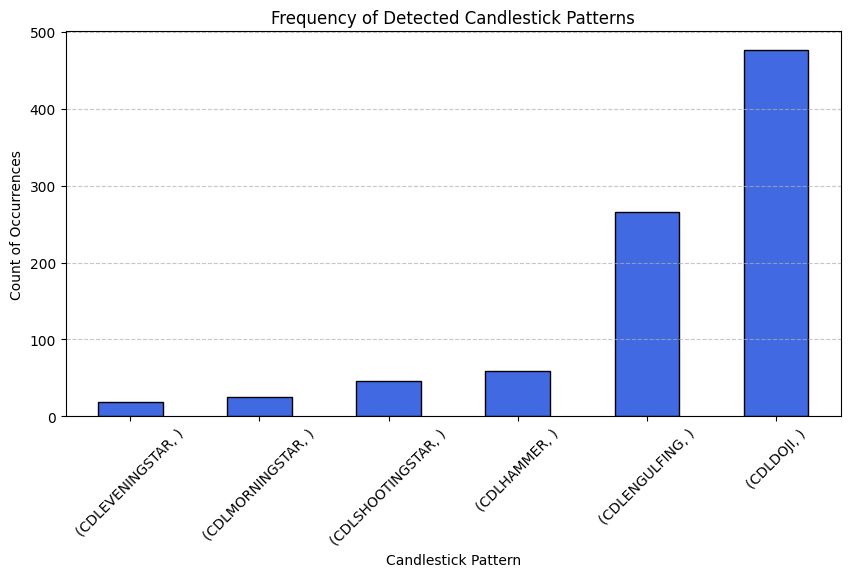

In [5]:
import matplotlib.pyplot as plt

# Select only the candlestick pattern columns
candlestick_columns = [
    "CDLDOJI", "CDLHAMMER", "CDLSHOOTINGSTAR", 
    "CDLMORNINGSTAR", "CDLEVENINGSTAR", "CDLENGULFING"
]

# Count occurrences of each pattern
pattern_counts = df[candlestick_columns].apply(lambda x: (x != 0).sum())

# Plot the pattern occurrences
plt.figure(figsize=(10, 5))
pattern_counts.sort_values().plot(kind='bar', color='royalblue', edgecolor='black')

plt.xlabel("Candlestick Pattern")
plt.ylabel("Count of Occurrences")
plt.title("Frequency of Detected Candlestick Patterns")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()

In [6]:
# Compute technical indicators

# Relative Strength Index (RSI)
df["RSI"] = talib.RSI(df["Close"].values.flatten(), timeperiod=30)
# Moving Average Convergence Divergence (MACD)
df["MACD"], df["MACD_signal"], df["MACD_hist"] = talib.MACD(df["Close"].values.flatten(), fastperiod=20, slowperiod=50, signalperiod=10)
# Average True Range (ATR)
df["ATR"] = talib.ATR(df["High"].values.flatten(), df["Low"].values.flatten(), df["Close"].values.flatten(), timeperiod=20)
# On-Balance Volume (OBV)
df["OBV"] = talib.OBV(df["Close"].values.flatten(), df["Volume"].astype(float).squeeze())

In [7]:
df.tail()

Price,Close,High,Low,Open,Volume,CDLDOJI,CDLHAMMER,CDLSHOOTINGSTAR,CDLMORNINGSTAR,CDLEVENINGSTAR,CDLENGULFING,RSI,MACD,MACD_signal,MACD_hist,ATR,OBV
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,,,,,,,
Date,,,,,,,,,,,,,,,,,
2023-12-22,192.444580,194.243775,191.818335,194.015137,37122800,0,0,0,0,0,0,57.254959,5.138162,5.194857,-0.056695,2.825661,1.821720e+10
2023-12-26,191.897873,192.732856,191.679185,192.454528,28919300,0,0,0,0,0,0,56.555384,4.921695,5.145191,-0.223496,2.737062,1.818828e+10
2023-12-27,191.997284,192.345201,189.949580,191.341234,48087700,0,0,0,0,0,0,56.655008,4.720712,5.068013,-0.347302,2.719990,1.823637e+10
2023-12-28,192.424728,193.498285,192.017172,192.981384,34049900,0,0,0,0,0,0,57.092658,4.552316,4.974250,-0.421934,2.659040,1.827042e+10
2023-12-29,191.380951,193.239786,190.585722,192.742770,42628800,0,0,0,0,0,0,55.672679,4.330456,4.857197,-0.526741,2.658792,1.822779e+10


In [8]:
df.isna().sum()

Price            Ticker
Close            AAPL       0
High             AAPL       0
Low              AAPL       0
Open             AAPL       0
Volume           AAPL       0
CDLDOJI                     0
CDLHAMMER                   0
CDLSHOOTINGSTAR             0
CDLMORNINGSTAR              0
CDLEVENINGSTAR              0
CDLENGULFING                0
RSI                        30
MACD                       58
MACD_signal                58
MACD_hist                  58
ATR                        20
OBV                         0
dtype: int64

In [9]:
df.dropna(inplace=True)
df.isna().sum()

Price            Ticker
Close            AAPL      0
High             AAPL      0
Low              AAPL      0
Open             AAPL      0
Volume           AAPL      0
CDLDOJI                    0
CDLHAMMER                  0
CDLSHOOTINGSTAR            0
CDLMORNINGSTAR             0
CDLEVENINGSTAR             0
CDLENGULFING               0
RSI                        0
MACD                       0
MACD_signal                0
MACD_hist                  0
ATR                        0
OBV                        0
dtype: int64

In [10]:
df.tail()

Price,Close,High,Low,Open,Volume,CDLDOJI,CDLHAMMER,CDLSHOOTINGSTAR,CDLMORNINGSTAR,CDLEVENINGSTAR,CDLENGULFING,RSI,MACD,MACD_signal,MACD_hist,ATR,OBV
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,,,,,,,
Date,,,,,,,,,,,,,,,,,
2023-12-22,192.444580,194.243775,191.818335,194.015137,37122800,0,0,0,0,0,0,57.254959,5.138162,5.194857,-0.056695,2.825661,1.821720e+10
2023-12-26,191.897873,192.732856,191.679185,192.454528,28919300,0,0,0,0,0,0,56.555384,4.921695,5.145191,-0.223496,2.737062,1.818828e+10
2023-12-27,191.997284,192.345201,189.949580,191.341234,48087700,0,0,0,0,0,0,56.655008,4.720712,5.068013,-0.347302,2.719990,1.823637e+10
2023-12-28,192.424728,193.498285,192.017172,192.981384,34049900,0,0,0,0,0,0,57.092658,4.552316,4.974250,-0.421934,2.659040,1.827042e+10
2023-12-29,191.380951,193.239786,190.585722,192.742770,42628800,0,0,0,0,0,0,55.672679,4.330456,4.857197,-0.526741,2.658792,1.822779e+10


In [11]:
# Define features 
X = df[[
    "Open", "High", "Low", "Close", "Volume",
    "CDLDOJI", "CDLHAMMER", "CDLSHOOTINGSTAR", "CDLMORNINGSTAR", "CDLEVENINGSTAR", "CDLENGULFING", 
    "RSI", "MACD", "MACD_signal", "ATR", "OBV" 
]]
X.tail()


Price,Open,High,Low,Close,Volume,CDLDOJI,CDLHAMMER,CDLSHOOTINGSTAR,CDLMORNINGSTAR,CDLEVENINGSTAR,CDLENGULFING,RSI,MACD,MACD_signal,ATR,OBV
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,,,,,,
Date,,,,,,,,,,,,,,,,
2023-12-22,194.015137,194.243775,191.818335,192.444580,37122800,0,0,0,0,0,0,57.254959,5.138162,5.194857,2.825661,1.821720e+10
2023-12-26,192.454528,192.732856,191.679185,191.897873,28919300,0,0,0,0,0,0,56.555384,4.921695,5.145191,2.737062,1.818828e+10
2023-12-27,191.341234,192.345201,189.949580,191.997284,48087700,0,0,0,0,0,0,56.655008,4.720712,5.068013,2.719990,1.823637e+10
2023-12-28,192.981384,193.498285,192.017172,192.424728,34049900,0,0,0,0,0,0,57.092658,4.552316,4.974250,2.659040,1.827042e+10
2023-12-29,192.742770,193.239786,190.585722,191.380951,42628800,0,0,0,0,0,0,55.672679,4.330456,4.857197,2.658792,1.822779e+10


In [12]:
# Define target
y = df["Close"]
y.tail()

Ticker,AAPL
Date,
2023-12-22,192.444580
2023-12-26,191.897873
2023-12-27,191.997284
2023-12-28,192.424728
2023-12-29,191.380951


In [13]:
from sklearn.model_selection import train_test_split

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)  # No shuffle for time series

# Check shape of training and testing data
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train.tail()

X_train shape: (2771, 16)
X_test shape: (693, 16)
y_train shape: (2771, 1)
y_test shape: (693, 1)


Price,Open,High,Low,Close,Volume,CDLDOJI,CDLHAMMER,CDLSHOOTINGSTAR,CDLMORNINGSTAR,CDLEVENINGSTAR,CDLENGULFING,RSI,MACD,MACD_signal,ATR,OBV
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,,,,,,
Date,,,,,,,,,,,,,,,,
2021-03-24,120.147521,120.225783,117.457360,117.476921,88530500,0,0,0,0,0,0,45.384108,-2.424008,-2.161956,3.591007,1.657219e+10
2021-03-25,116.938886,119.012759,116.410635,117.966034,98844700,0,0,0,0,0,0,45.825600,-2.473979,-2.218688,3.541563,1.667103e+10
2021-03-26,117.731268,118.836685,116.332383,118.572556,94071200,0,0,0,0,0,0,46.381604,-2.474199,-2.265144,3.489700,1.676511e+10
2021-03-29,119.002971,119.912735,118.102992,118.748627,80819200,1,0,0,0,0,0,46.546354,-2.455286,-2.299715,3.405702,1.684593e+10
2021-03-30,117.496499,117.780189,116.273698,117.291069,85671900,1,0,0,0,0,0,45.352973,-2.511330,-2.338191,3.359163,1.676025e+10


In [14]:
y_train.tail()

Ticker,AAPL
Date,
2021-03-24,117.476921
2021-03-25,117.966034
2021-03-26,118.572556
2021-03-29,118.748627
2021-03-30,117.291069


In [15]:
from sklearn.preprocessing import MinMaxScaler

# Identify candlestick pattern columns (binary features)
candlestick_cols = [
    "CDLDOJI", 
    "CDLHAMMER",
    "CDLSHOOTINGSTAR", 
    "CDLMORNINGSTAR",
    "CDLEVENINGSTAR", 
    "CDLENGULFING"
]

# Identify numerical feature columns (exclude candlestick patterns)
numerical_cols = [col for col in X_train.columns if col not in candlestick_cols]

# Initialize MinMaxScaler
scaler_x = MinMaxScaler()

# Scale only numerical columns while preserving binary features
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_cols] = scaler_x.fit_transform(X_train[numerical_cols])
X_test_scaled[numerical_cols] = scaler_x.transform(X_test[numerical_cols])

# Ensure candlestick pattern columns remain binary (0 or 1)
X_train_scaled[candlestick_cols] = X_train[candlestick_cols]  # Reassign original values
X_test_scaled[candlestick_cols] = X_test[candlestick_cols]


X_train_scaled.tail()



Price,Open,High,Low,Close,Volume,CDLDOJI,CDLHAMMER,CDLSHOOTINGSTAR,CDLMORNINGSTAR,CDLEVENINGSTAR,CDLENGULFING,RSI,MACD,MACD_signal,ATR,OBV
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,,,,,,
Date,,,,,,,,,,,,,,,,
2021-03-24,0.849029,0.840401,0.843819,0.831687,0.023471,0,0,0,0,0,0,0.281176,0.110622,0.111389,0.739956,0.617531
2021-03-25,0.824951,0.831394,0.835895,0.835369,0.029090,0,0,0,0,0,0,0.289824,0.107504,0.107507,0.729435,0.621924
2021-03-26,0.830897,0.830087,0.835302,0.839935,0.026490,0,0,0,0,0,0,0.300715,0.107490,0.104328,0.718399,0.626105
2021-03-29,0.840440,0.838076,0.848707,0.841260,0.019270,1,0,0,0,0,0,0.303942,0.108671,0.101962,0.700526,0.629696
2021-03-30,0.829136,0.822242,0.834858,0.830288,0.021914,1,0,0,0,0,0,0.280566,0.105174,0.099330,0.690623,0.625889


In [18]:
# Initialize MinMaxScaler
scaler_y = MinMaxScaler()

# Scale only numerical columns while preserving binary features
y_train_scaled = y_train.copy()
y_test_scaled = y_test.copy()

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))  # Fit only on train
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))  # Transform test using same scaler

# Convert back to DataFrame to avoid errors in PyTorch training
y_train_scaled = pd.DataFrame(y_train_scaled, index=y_train.index, columns=["Close_Target"])
y_test_scaled = pd.DataFrame(y_test_scaled, index=y_test.index, columns=["Close_Target"])

y_train_scaled.tail()


,Close_Target
Date,
2021-03-24,0.831687
2021-03-25,0.835369
2021-03-26,0.839935
2021-03-29,0.841260
2021-03-30,0.830288


In [19]:
X_test_scaled.head()

Price,Open,High,Low,Close,Volume,CDLDOJI,CDLHAMMER,CDLSHOOTINGSTAR,CDLMORNINGSTAR,CDLEVENINGSTAR,CDLENGULFING,RSI,MACD,MACD_signal,ATR,OBV
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,,,,,,
Date,,,,,,,,,,,,,,,,
2021-03-31,0.840440,0.844904,0.851817,0.846857,0.039702,0,0,0,0,0,0,0.321788,0.110413,0.098220,0.692560,0.631147
2021-04-01,0.855196,0.849697,0.861741,0.853116,0.016148,0,0,0,0,0,0,0.337047,0.118439,0.098913,0.677852,0.634485
2021-04-05,0.856737,0.864079,0.866036,0.874472,0.023537,0,0,0,0,0,0,0.387468,0.135869,0.102955,0.675640,0.638424
2021-04-06,0.876044,0.871124,0.885143,0.876755,0.018917,0,0,0,0,0,0,0.392738,0.152551,0.109589,0.656054,0.641987
2021-04-07,0.871125,0.876862,0.881366,0.889200,0.020712,0,0,0,0,0,1,0.421408,0.173239,0.119141,0.650977,0.645697


In [20]:
y_test_scaled.head()

,Close_Target
Date,
2021-03-31,0.846857
2021-04-01,0.853116
2021-04-05,0.874472
2021-04-06,0.876755
2021-04-07,0.889200


In [21]:
def create_sequences(X, y, time_step=60):
    Xs, ys = [], []
    for i in range(len(X) - time_step - 1):
        Xs.append(X.iloc[i:i+time_step].values)  # Past 60 days of features
        ys.append(y.iloc[i+time_step].values)    # Target variable (next day's close)
    return np.array(Xs), np.array(ys)

# Create sequences
time_step = 60
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_scaled, time_step)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test_scaled, time_step)

# Print shapes to verify
print("X_train_seq shape:", X_train_seq.shape)
print("y_train_seq shape:", y_train_seq.shape)
print("X_test_seq shape:", X_test_seq.shape)
print("y_test_seq shape:", y_test_seq.shape)


X_train_seq shape: (2710, 60, 16)
y_train_seq shape: (2710, 1)
X_test_seq shape: (632, 60, 16)
y_test_seq shape: (632, 1)


In [ ]:

#Transformer below this


In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [23]:
# Convert NumPy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train_seq, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_seq, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test_seq, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_seq, dtype=torch.float32)

# Reshape for Transformer: (batch, sequence_length, features)
batch_size = 32
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [24]:
# Define Transformer Model
class TransformerStockPredictor(nn.Module):
    def __init__(self, input_dim, num_heads, hidden_dim, num_layers, dropout=0.3):
        super(TransformerStockPredictor, self).__init__()

        self.encoder_layer = nn.TransformerEncoderLayer(
            d_model=input_dim, nhead=num_heads, dim_feedforward=hidden_dim, dropout=dropout
        )
        self.transformer = nn.TransformerEncoder(self.encoder_layer, num_layers=num_layers)

        self.fc = nn.Linear(input_dim, 1)  # Output layer for regression

    def forward(self, x):
        x = self.transformer(x)  # Transformer encoder
        x = self.fc(x[:, -1, :])  # Take last time step output
        return x

In [25]:
# Initialize Model
input_dim = X_train_seq.shape[2]  # Number of features
model = TransformerStockPredictor(input_dim=input_dim, num_heads=8, hidden_dim=128, num_layers=3)

optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.MSELoss()


c:\Users\caleb\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


In [26]:
# Training Loop
epochs = 50
model.train()
for epoch in range(epochs):
    total_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        output = model(X_batch)
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    
    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader):.4f}")

Epoch 1/50, Loss: 0.0917
Epoch 2/50, Loss: 0.0575
Epoch 3/50, Loss: 0.0438
Epoch 4/50, Loss: 0.0379
Epoch 5/50, Loss: 0.0332
Epoch 6/50, Loss: 0.0290
Epoch 7/50, Loss: 0.0265
Epoch 8/50, Loss: 0.0222
Epoch 9/50, Loss: 0.0205
Epoch 10/50, Loss: 0.0177
Epoch 11/50, Loss: 0.0177
Epoch 12/50, Loss: 0.0159
Epoch 13/50, Loss: 0.0141
Epoch 14/50, Loss: 0.0140
Epoch 15/50, Loss: 0.0123
Epoch 16/50, Loss: 0.0123
Epoch 17/50, Loss: 0.0109
Epoch 18/50, Loss: 0.0106
Epoch 19/50, Loss: 0.0103
Epoch 20/50, Loss: 0.0093
Epoch 21/50, Loss: 0.0092
Epoch 22/50, Loss: 0.0087
Epoch 23/50, Loss: 0.0082
Epoch 24/50, Loss: 0.0080
Epoch 25/50, Loss: 0.0076
Epoch 26/50, Loss: 0.0077
Epoch 27/50, Loss: 0.0073
Epoch 28/50, Loss: 0.0067
Epoch 29/50, Loss: 0.0064
Epoch 30/50, Loss: 0.0061
Epoch 31/50, Loss: 0.0062
Epoch 32/50, Loss: 0.0059
Epoch 33/50, Loss: 0.0058
Epoch 34/50, Loss: 0.0054
Epoch 35/50, Loss: 0.0054
Epoch 36/50, Loss: 0.0053
Epoch 37/50, Loss: 0.0054
Epoch 38/50, Loss: 0.0052
Epoch 39/50, Loss: 0.

In [27]:
# Evaluate Model
model.eval()
with torch.no_grad():
    y_pred_train = model(X_train_tensor).numpy()
    y_pred_test = model(X_test_tensor).numpy()


# Inverse Transform Predictions
y_pred_train_actual = scaler_y.inverse_transform(y_pred_train)
y_pred_test_actual = scaler_y.inverse_transform(y_pred_test)
y_train_actual = scaler_y.inverse_transform(y_train_seq)
y_test_actual = scaler_y.inverse_transform(y_test_seq)

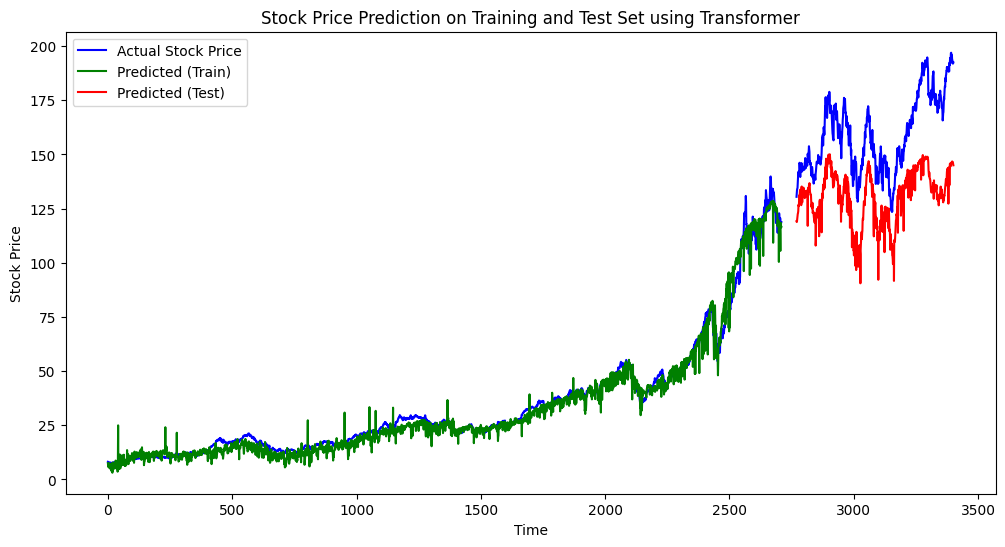

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure y_train_actual and y_test_actual are flattened arrays
y_train_actual = np.array(y_train_actual).flatten()
y_test_actual = np.array(y_test_actual).flatten()

# Create a NumPy array with NaNs to represent the gap
nan_gap = np.full(60, np.nan)

# Combine actual stock price with a 60-day gap
actual_with_gap = np.concatenate([y_train_actual, nan_gap, y_test_actual])

# Plot actual stock prices with gap
plt.figure(figsize=(12, 6))
plt.plot(range(len(actual_with_gap)), actual_with_gap, label="Actual Stock Price", color='blue')

# Plot training set predictions
plt.plot(range(len(y_train_actual)), y_pred_train_actual, label="Predicted (Train)", color='green')

# Plot test set predictions, shifting them by 60 days
plt.plot(range(len(y_train_actual) + 60, len(y_train_actual) + len(y_test_actual) + 60), 
         y_pred_test_actual, label="Predicted (Test)", color='red')

# Labels and title
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Stock Price Prediction on Training and Test Set using Transformer")
plt.legend()
plt.show()


In [118]:
# Compute Accuracy Metrics
mae = mean_absolute_error(y_test_actual, y_pred_test_actual)
mse = mean_squared_error(y_test_actual, y_pred_test_actual)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, y_pred_test_actual)

print("\nEvaluation Metrics on Test Set:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


Evaluation Metrics on Test Set:
MAE: 53.2587
MSE: 2933.4669
RMSE: 54.1615
R-squared (R²): -8.7682


In [ ]:
#LSTM below this

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define LSTM model
model = Sequential()

# First LSTM layer with Dropout
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, X_train_seq.shape[2])))
model.add(Dropout(0.2))

# Second LSTM layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Third LSTM layer (no return_sequences)
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Fully connected layers
model.add(Dense(units=25))
model.add(Dense(units=1))  # Output layer

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

# Show summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 60, 50)         │        13,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 60, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,101 (215.24 KB)

 Trainable params: 55,101 (215.24 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# Train the LSTM model
history = model.fit(X_train_seq, y_train_seq, epochs=50, batch_size=32, validation_data=(X_test_seq, y_test_seq), verbose=1)


Epoch 1/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0449 - val_loss: 0.0492
Epoch 2/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0027 - val_loss: 0.0437
Epoch 3/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0026 - val_loss: 0.0361
Epoch 4/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0021 - val_loss: 0.0274
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0019 - val_loss: 0.0219
Epoch 6/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0017 - val_loss: 0.0199
Epoch 7/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0015 - val_loss: 0.0236
Epoch 8/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0014 - val_loss: 0.0117
Epoch 9/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0012 - val_loss: 0.0123
Epoch 10/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0013 - val_loss: 0.0177
Epoch 11/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0013 - val_loss: 0.0122
Epoch 12/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0

In [32]:
# Predict on test set
y_pred_train = model.predict(X_train_seq)
y_pred_test = model.predict(X_test_seq)

# Inverse transform predictions
y_pred_train_actual = scaler_y.inverse_transform(y_pred_train)
y_pred_test_actual = scaler_y.inverse_transform(y_pred_test)


85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


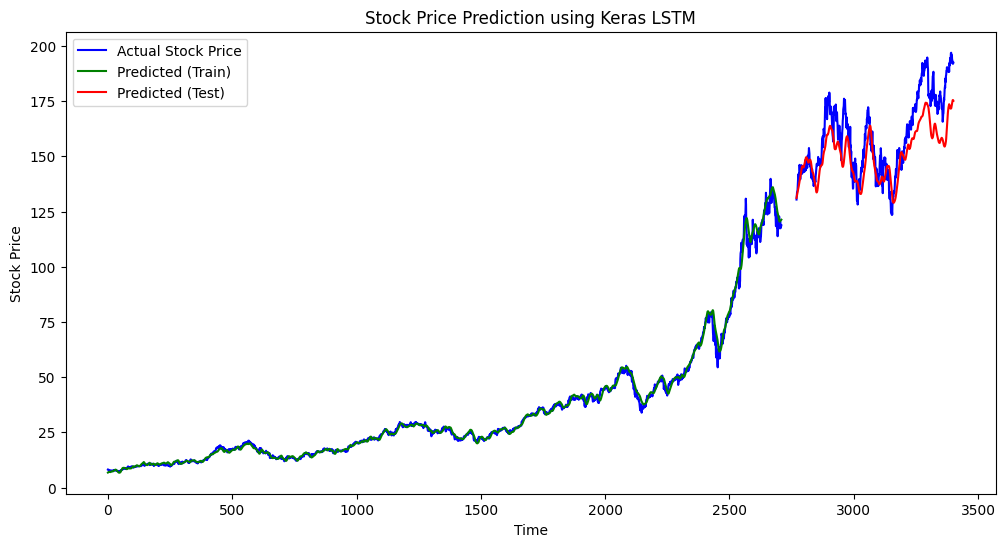

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure
plt.figure(figsize=(12, 6))

# Adjust actual stock prices to include the 60-day gap
actual_with_gap = list(y_train_actual) + [np.nan] * 60 + list(y_test_actual)

# Plot actual stock prices
plt.plot(range(len(actual_with_gap)), actual_with_gap, label="Actual Stock Price", color='blue')

# Plot training set predictions
plt.plot(range(len(y_train_actual)), y_pred_train_actual, label="Predicted (Train)", color='green')

# Plot test set predictions, shifting them by 60 days
plt.plot(range(len(y_train_actual) + 60, len(y_train_actual) + 60 + len(y_test_actual)), 
         y_pred_test_actual, label="Predicted (Test)", color='red')

# Labels and title
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Stock Price Prediction using Keras LSTM")
plt.legend()
plt.show()



In [34]:
import numpy as np

# Function to predict the next 60 days
def forecast_next_days(model, X_test_seq, time_step=60, future_days=60):
    last_sequence = X_test_seq[-1]  # Take the last available sequence
    future_predictions = []

    for _ in range(future_days):
        # Reshape to (1, time_step, features) for prediction
        input_seq = last_sequence.reshape(1, time_step, -1)
        next_pred = model.predict(input_seq)[0][0]  # Predict the next day's closing price

        # Append prediction to results
        future_predictions.append(next_pred)

        # Create the next input sequence by shifting and appending the new prediction
        last_sequence = np.roll(last_sequence, -1, axis=0)  # Shift sequence
        last_sequence[-1, -1] = next_pred  # Replace last value with predicted close

    return np.array(future_predictions)

# Perform forecasting
future_preds_scaled = forecast_next_days(model, X_test_seq, time_step=60, future_days=60)

# Inverse transform to get actual price values
future_preds_actual = scaler_y.inverse_transform(future_preds_scaled.reshape(-1, 1))

# Print the forecasted prices
print("Future 60-day Forecast:", future_preds_actual.flatten())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━

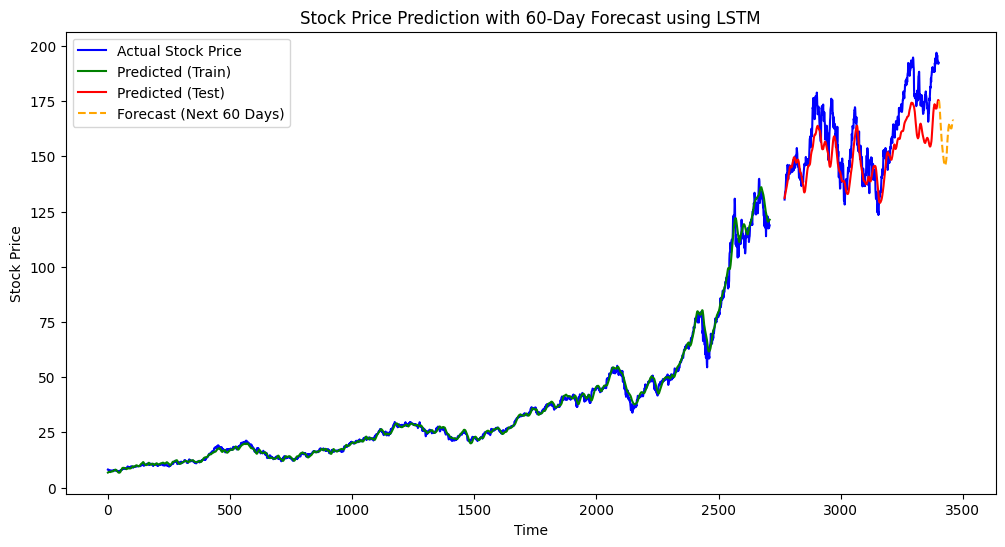

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure
plt.figure(figsize=(12, 6))

# Adjust actual stock prices to include the 60-day gap
actual_with_gap = list(y_train_actual) + [np.nan] * 60 + list(y_test_actual)

# Plot actual stock prices
plt.plot(range(len(actual_with_gap)), actual_with_gap, label="Actual Stock Price", color='blue')

# Plot training set predictions
plt.plot(range(len(y_train_actual)), y_pred_train_actual, label="Predicted (Train)", color='green')

# Plot test set predictions, shifting them by 60 days
plt.plot(range(len(y_train_actual) + 60, len(y_train_actual) + 60 + len(y_test_actual)), 
         y_pred_test_actual, label="Predicted (Test)", color='red')

# Plot future 60-day forecast, shifting it ahead of the test set
plt.plot(range(len(y_train_actual) + 60 + len(y_test_actual), 
               len(y_train_actual) + 60 + len(y_test_actual) + 60), 
         future_preds_actual, label="Forecast (Next 60 Days)", color='orange', linestyle="dashed")

# Labels and title
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Stock Price Prediction with 60-Day Forecast using LSTM")
plt.legend()
plt.show()
